In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import geopandas as gpd

**DATA EXPLORATION**

In [2]:
# Load the Final CSV files into DataFrame
final_path = '/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv'     
# Read the CSV file into DataFrame
final_df = pd.read_csv(final_path)
# Check the shape of the DataFrame  
print(f"(Records, Columns) of final_df: {final_df.shape}")
final_df.head()

(Records, Columns) of final_df: (28242, 8)


,region,crop,year,yield_hg_ha,yield_t_ha,rainfall_mm,avg_temp_c,pesticide_t
0,Albania,Maize,1990,36613,366.13,1485.0,16.37,121.0
1,Albania,Maize,1991,29068,290.68,1485.0,15.36,121.0
2,Albania,Maize,1992,24876,248.76,1485.0,16.06,121.0
3,Albania,Maize,1993,24185,241.85,1485.0,16.05,121.0
4,Albania,Maize,1994,25848,258.48,1485.0,16.96,201.0


In [3]:
final_df.describe()

,year,yield_hg_ha,yield_t_ha,rainfall_mm,avg_temp_c,pesticide_t
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,770.533321,1149.05598,20.542627,37076.909344
std,7.051905,84956.612897,849.566129,709.81215,6.312051,59958.784665
min,1990.000000,50.000000,0.500000,51.00000,1.300000,0.040000
25%,1995.000000,19919.250000,199.192500,593.00000,16.702500,1702.000000
50%,2001.000000,38295.000000,382.950000,1083.00000,21.510000,17529.440000
75%,2008.000000,104676.750000,1046.767500,1668.00000,26.000000,48687.880000
max,2013.000000,501412.000000,5014.120000,3240.00000,30.650000,367778.000000


In [4]:
final_df['region'].nunique()

101

In [5]:
# Country with highest yield in hectares
final_df.groupby(['region'],sort=True)['yield_hg_ha'].sum().nlargest(10)


region
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: yield_hg_ha, dtype: int64

In [6]:
final_df.groupby(['crop', 'region'], sort=True)['yield_hg_ha'].sum().nlargest(10)

crop            region        
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: yield_hg_ha, dtype: int64

#DATA VISUALIZATION

**Time Series:**  

**Crop Yield Over Time**

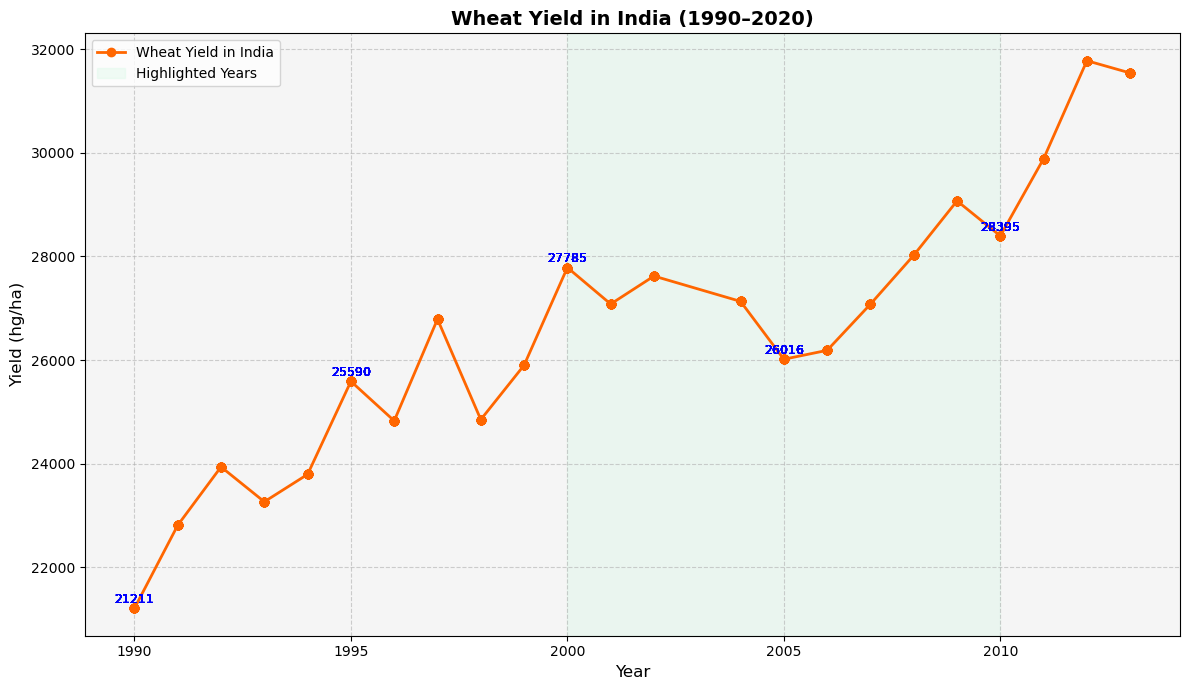

In [7]:
# Filter the data for Region as "India", Crop as "Wheat", and Year >= 1990
filtered_data = final_df[(final_df['region'] == 'India') & (final_df['crop'] == 'Wheat') & (final_df['year'] >= 1990)]

# Create a figure and axis
plt.figure(figsize=(12, 7))

# Plot the Wheat Yield over the years with enhancements
plt.plot(filtered_data['year'], filtered_data['yield_hg_ha'], 
         marker='o', linestyle='-', color='#ff6600', 
         label='Wheat Yield in India', linewidth=2)

# Add a shaded region to highlight certain years (e.g., 2000–2010)
plt.axvspan(2000, 2010, color='#d3f8e2', alpha=0.3, label='Highlighted Years')

# Add annotations for key data points
for year, yield_value in zip(filtered_data['year'], filtered_data['yield_hg_ha']):
    if year % 5 == 0:  # Annotate every 5 years
        plt.text(year, yield_value + 100, f'{yield_value:.0f}', fontsize=9, 
                 color='blue', ha='center')

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)
plt.title('Wheat Yield in India (1990–2020)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend( fontsize=10)
plt.style.use('ggplot')  # Apply a visual style

# Add a background color to the figure
plt.gca().set_facecolor('#f5f5f5')  # Set a light gray background for the plot

# Display the plot
plt.tight_layout()
plt.show()


**Kernel Density Estimation (KDE) heatmap:**


**Correlations between average temperature and crop yield.**

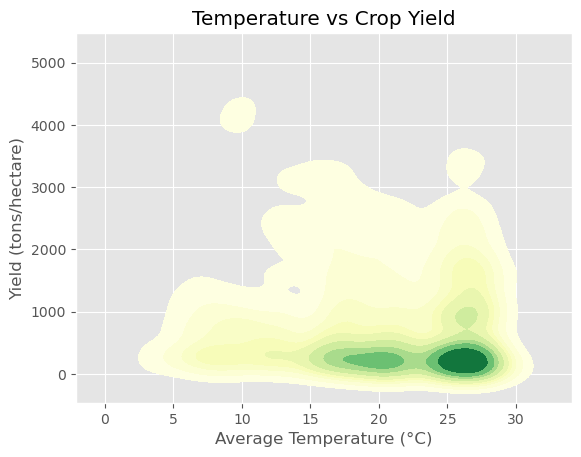

In [8]:
# Lighter colors indicating higher density (more data points in that area) 
# Darker colors showing lower density.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv")

# Example heatmap
sns.kdeplot(x='avg_temp_c', y='yield_t_ha', data=df, cmap='YlGn', fill=True)
plt.title('Temperature vs Crop Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (tons/hectare)')
plt.show()


**Geospatial scatter plot:** 

**Crop yields based on geographical locations derived from your GeoJSON file**

/var/folders/7g/q4bdxd8s7xd3lw5j6j3g_m2r0000gq/T/ipykernel_5415/2084700816.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid  # Calculate centroids


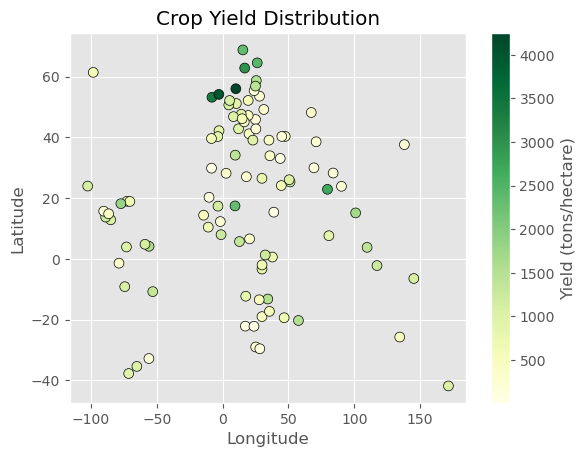

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Geospatial Scatter Plot
# You can plot individual points for crop yield using matplotlib or seaborn. If data includes latitude and longitude (or centroids), you can overlay points on a base map.
# Load GeoJSON
gdf = gpd.read_file("/Users/GURU/Desktop/Project3_Group1/custom_updated.geo.json")

# Scatter plot
gdf['centroid'] = gdf.geometry.centroid  # Calculate centroids
gdf['coords'] = gdf['centroid'].apply(lambda x: (x.x, x.y))  # Extract coordinates

# Extract x and y coordinates for plotting
x_coords = [coord[0] for coord in gdf['coords']]
y_coords = [coord[1] for coord in gdf['coords']]
plt.scatter(x_coords, y_coords, c=gdf['yield_t_ha'], cmap='YlGn', s=50, edgecolor='black')

plt.title('Crop Yield Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Yield (tons/hectare)')
plt.show()


**Interactive Scatter plot: created using Plotly Express**

 **Total pesticide usage over years**

In [ ]:
import pandas as pd
import plotly.express as px
# When hovering over each point, 
# it displays a tooltip with detailed data (Year, Pesticides Usage, and Crop Yield).
# Record for 2003 is missing in the dataset

# Step 1: Load the CSV file
csv_file = "/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv"
final_crop_data = pd.read_csv(csv_file)

# Step 2: Convert 'year' column to integers
final_crop_data['year'] = final_crop_data['year'].astype(int)

# Step 3: Aggregate data by year
yearly_data = final_crop_data.groupby('year').agg({
    'pesticide_t': 'sum',  # Sum pesticide usage per year
    'yield_hg_ha': 'mean'  # Calculate average crop yield per year
}).reset_index()

# Step 4: Create an interactive scatter plot with hover functionality
fig = px.scatter(
    yearly_data,
    x='year',  # X-axis: Year
    y='pesticide_t',  # Primary Y-axis: Total Pesticides
    color='yield_hg_ha',  # Color points by average yield (optional)
    size='yield_hg_ha',  # Optional: Size points by yield
    hover_data=['year', 'pesticide_t', 'yield_hg_ha'],  # Additional info on hover
    title='Pesticides Usage Over the Years',
    labels={'pesticide_t': 'Total Pesticides (tonnes)', 'yield_hg_ha': 'Average Yield (hg/ha)'}
)

# Show the interactive plot
fig.show()


**Dual-axis line plot:**

 **Analyze trends in two related metrics—total pesticide usage and average crop yield**

<Figure size 1200x800 with 0 Axes>

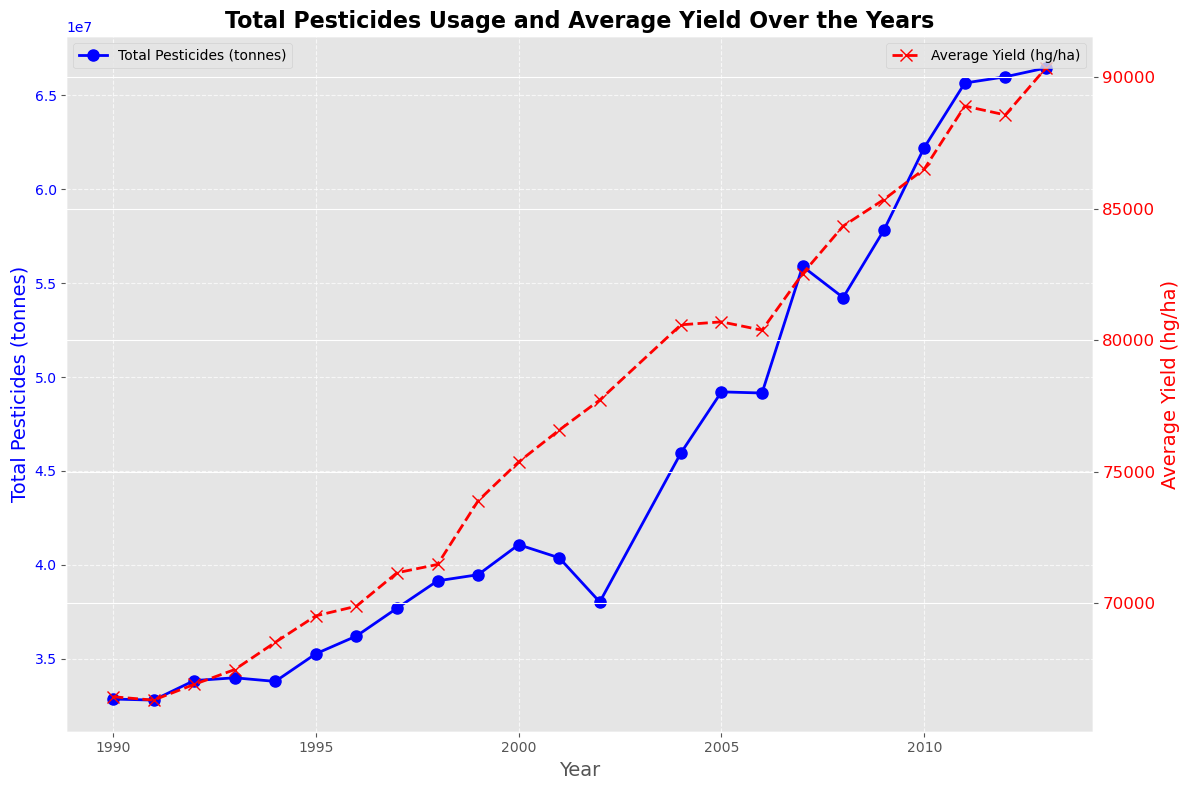

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
csv_file = "/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv"
final_crop_data = pd.read_csv(csv_file)

# Step 2: Convert 'year' column to integers to remove floats
final_crop_data['year'] = final_crop_data['year'].astype(int)

# Step 3: Aggregate data by year
yearly_data = final_crop_data.groupby('year').agg({
    'pesticide_t': 'sum',  # Sum pesticide usage per year
    'yield_hg_ha': 'mean'  # Calculate average crop yield per year
}).reset_index()

# Step 4: Create the dual-axis plot
plt.figure(figsize=(12, 8))  # Set figure size

fig, ax1 = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Plot total pesticide usage on the primary y-axis
ax1.plot(yearly_data['year'], yearly_data['pesticide_t'],
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8, label='Total Pesticides (tonnes)')
ax1.set_xlabel('Year', fontsize=14)  # X-axis label
ax1.set_ylabel('Total Pesticides (tonnes)', fontsize=14, color='b')  # Primary y-axis label
ax1.tick_params(axis='y', labelcolor='b')  # Color the y-axis ticks for pesticides in blue

# Add gridlines to the primary axis
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot average crop yield on the secondary y-axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(yearly_data['year'], yearly_data['yield_hg_ha'],
         marker='x', color='r', linestyle='--', linewidth=2, markersize=8, label='Average Yield (hg/ha)')
ax2.set_ylabel('Average Yield (hg/ha)', fontsize=14, color='r')  # Secondary y-axis label
ax2.tick_params(axis='y', labelcolor='r')  # Color the y-axis ticks for yield in red

# Step 5: Add title and legend
plt.title('Total Pesticides Usage and Average Yield Over the Years', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add background color for the plot area
plt.gca().set_facecolor('#f5f5f5')

# Add legends for both axes
ax1.legend(loc='upper left')  # Legend for pesticides
ax2.legend(loc='upper right')  # Legend for crop yield

# Step 6: Adjust layout and display the plot
plt.tight_layout()  # Ensure proper spacing between elements
plt.show()


In [ ]:
# Calculate the mean temperature for the entire dataset
temp_mean = final_crop_data['avg_temp'].mean()
final_crop_data['yield_per_pesticide'] = final_crop_data['hg/ha_yield'] / final_crop_data['pesticides_tonnes']
final_crop_data['yield_per_rainfall'] = final_crop_data['hg/ha_yield'] / final_crop_data['average_rain_fall_mm_per_year']
final_crop_data['temp_deviation'] = final_crop_data['avg_temp'] - temp_mean

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line
sns.regplot(x='yield_per_pesticide', y='yield_per_rainfall', data=final_crop_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Color the points based on temperature deviation
points = plt.scatter(final_crop_data['yield_per_pesticide'], final_crop_data['yield_per_rainfall'], 
                     c=final_crop_data['temp_deviation'], cmap='coolwarm', s=100, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Relationship Between Yield per Pesticide and Yield per Rainfall', fontsize=16, fontweight='bold')
plt.xlabel('Yield per Pesticide (hg/ha per tonne)', fontsize=14)
plt.ylabel('Yield per Rainfall (hg/ha per mm/year)', fontsize=14)

# Add a color bar to indicate the temperature deviation
cbar = plt.colorbar(points)
cbar.set_label('Temperature Deviation from Mean (°C)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot with Hue Differentiation
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='average_rain_fall_mm_per_year',
    y='hg/ha_yield',
    data=final_crop_data,
    hue='average_rain_fall_mm_per_year',  # Assign hue for color gradient
    palette='viridis',  # Use a colorblind-friendly palette
    edgecolor='black',
    s=100  # Adjust marker size
)

plt.title('Relationship between Rainfall and hg/ha Yield', fontsize=16, fontweight='bold')
plt.xlabel('Average Rainfall (mm per year)', fontsize=14)
plt.ylabel('hg/ha Yield', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import json

# Paths to your files
csv_file = "/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv"
geojson_file = "/Users/GURU/Desktop/Project3_Group1/custom.geo.json"
output_file = "/Users/GURU/Desktop/Project3_Group1/custom_updated.geo.json"

# Load the CSV data
csv_data = pd.read_csv(csv_file)

# Filter the latest year (e.g., 2000 for simplicity)
latest_year_data = csv_data[csv_data['year'] == 2000]  # Adjust year as needed

# Load the GeoJSON data
with open(geojson_file, 'r') as file:
    geojson_data = json.load(file)

# Combine CSV data into GeoJSON features
for feature in geojson_data['features']:
    # Get the country name from GeoJSON
    admin = feature['properties']['admin']

    # Find the matching row in the CSV file
    match = latest_year_data[latest_year_data['region'] == admin]  # Replace 'region' with the correct column

    if not match.empty:
        # Add yield_t_ha to GeoJSON properties
        feature['properties']['yield_t_ha'] = match.iloc[0]['yield_t_ha']
    else:
        # If no match, set crop yield to None
        feature['properties']['yield_t_ha'] = None

# Save the updated GeoJSON to a new file
with open(output_file, 'w') as file:
    json.dump(geojson_data, file, indent=4)

print("GeoJSON updated successfully!")


In [ ]:
# Choropleth Heatmap (Like the Leaflet Visualization)
# Using libraries like geopandas and matplotlib, you can create a static choropleth map where countries are color-coded based on crop yield (yield_t_ha).
# Load GeoJSON
import folium
import json
import pandas as pd

# File paths
geojson_file = "/Users/GURU/Desktop/Project3_Group1/custom_updated.geo.json"
csv_file = "/Users/GURU/Desktop/Project3_Group1/Resources/final_crop_data.csv"

# Load GeoJSON data
with open(geojson_file, 'r') as file:
    geojson_data = json.load(file)

# Load CSV data
csv_data = pd.read_csv(csv_file)

# Preprocess data: Find the crop with the maximum yield for each region
max_yield_data = (
    csv_data.groupby('region')
    .apply(lambda x: x.loc[x['yield_t_ha'].idxmax()])
    [['region', 'crop', 'yield_t_ha']]
)
max_yield_data.reset_index(drop=True, inplace=True)

# Create a lookup dictionary for quick access
region_max_crop = {
    row['region']: (row['crop'], row['yield_t_ha']) for _, row in max_yield_data.iterrows()
}

# Initialize the map
m = folium.Map(location=[20, 0], zoom_start=2)  # Center at latitude 20, longitude 0

# Add multiple high-quality basemaps
standard_map = folium.TileLayer('OpenStreetMap', name='Standard Map')
dark_matter_map = folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png',
    name='Dark Matter',
    attr='CartoDB Dark Matter'
)
toner_map = folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    name='Toner',
    attr='Stamen Toner'
)
topo_map = folium.TileLayer(
    tiles='https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
    name='Topographic Map',
    attr='OpenTopoMap'
)

# Add basemap layers to the map
standard_map.add_to(m)  # Default map layer
dark_matter_map.add_to(m)
toner_map.add_to(m)
topo_map.add_to(m)

# Define function to style features based on yield
def style_function(feature):
    # Safely get yield_t_ha and default to 0 if missing or None
    yield_value = feature['properties'].get('yield_t_ha', 0) or 0
    return {
        'fillColor': '#006837' if yield_value > 300 else
                     '#31a354' if yield_value > 250 else
                     '#78c679' if yield_value > 200 else
                     '#c2e699' if yield_value > 100 else
                     '#ffffcc',
        'color': 'black',       # Outline color
        'weight': 1,            # Outline thickness
        'fillOpacity': 0.7      # Transparency of fill
    }

# Add GeoJSON layer with hover tooltips and popups
def popup_content(feature):
    region = feature['properties'].get('admin', "Unknown Region")
    yield_value = feature['properties'].get('yield_t_ha', "N/A")

    # Get crop with the maximum yield for the region
    max_crop, max_yield = region_max_crop.get(region, ("N/A", "N/A"))

    # Generate popup content
    return f"""
    <b>Region:</b> {region}<br>
    <b>Yield (tons/hectare):</b> {yield_value}<br>
    <b>Crop with Max Yield:</b> {max_crop} ({max_yield} tons/hectare)
    """

geojson_layer = folium.GeoJson(
    geojson_data,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['admin', 'yield_t_ha'],
        aliases=['Region:', 'Yield (tons/hectare):'],
        localize=True
    ),
    name='Crop Yield Data'
)

# Attach popup content dynamically
for feature in geojson_layer.data['features']:
    feature['popup'] = popup_content(feature)

geojson_layer.add_to(m)

# Add a legend (color-coded bands)
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 240px; height: 180px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
    <b>Crop Yield (tons/hectare)</b><br>
    <i style="background: #006837; width: 20px; height: 10px; display: inline-block;"></i> 300+<br>
    <i style="background: #31a354; width: 20px; height: 10px; display: inline-block;"></i> 250-300<br>
    <i style="background: #78c679; width: 20px; height: 10px; display: inline-block;"></i> 200-250<br>
    <i style="background: #c2e699; width: 20px; height: 10px; display: inline-block;"></i> 100-200<br>
    <i style="background: #ffffcc; width: 20px; height: 10px; display: inline-block;"></i> 0-100<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
output_file = "/Users/GURU/Desktop/Project3_Group1/crop_yield_map_with_enhanced_basemaps.html"
m.save(output_file)

print(f"Interactive map with enhanced basemaps and crop details saved to {output_file}")

